# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [57]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [58]:
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

print(tests)


0    (0.37135276140544865, 0.830542331021026)
1    (2.244703300480493, 0.32551340016467933)
2    (0.1120846592860227, 0.9454991124034167)
3    (1.2659193897197305, 0.5310178221885373)
4    (2.4271297333811823, 0.2971361384181187)
dtype: object


#### Interpret the normaltest results and make your observations.

In [59]:
#print(tests[1].statistic)
#print(tests[1].pvalue)

for e in tests:
    if e.pvalue<(mu*0.05):
        print("Is a normal distribution")
    else:
        print("Not a normal distribution")

Is a normal distribution
Is a normal distribution
Is a normal distribution
Is a normal distribution
Is a normal distribution


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

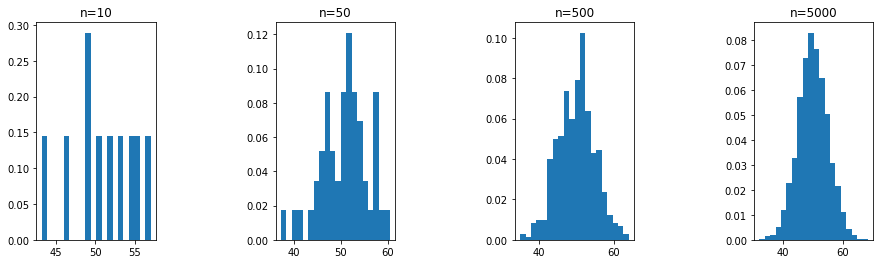

In [60]:
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Conforme la muestra es más grande el resultado se va acercando más al centro que es la media de la normal. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

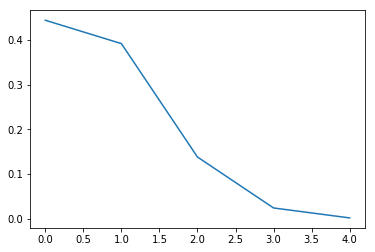

In [61]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

Conforme la muestra es mayor, la probabilidad de que entren en el anuncio es menor.

#### Now plot PMP with 50, 500, and 5000 visitors.

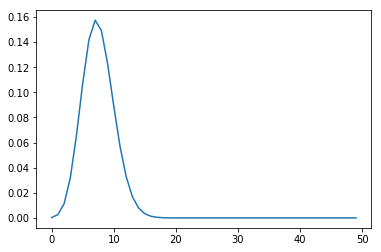

In [62]:
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

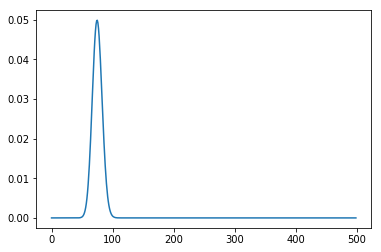

In [63]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

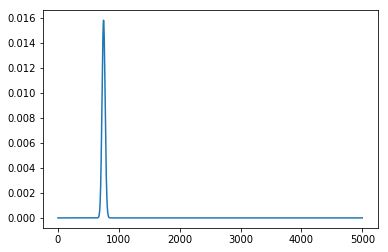

In [64]:
n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

Conforme aumentamos la muestra la gráfica se va acercando más al 15% de probabilidad de click definido previamente.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Es el caso extremo de una binomial cuando n tiende a infinito y p tiende a cero y es una distribución para casos con pocos datos (sucesos raros).


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [96]:
prob1 = poisson.pmf(300, 320)
print("The probability is", prob1)

The probability is 0.01216063471394124


#### What is the probability of getting 60 visits?

In [97]:
prob2 = poisson.pmf(300, 60)
print("The probability is", prob2)

The probability is 7.97816763099837e-108


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

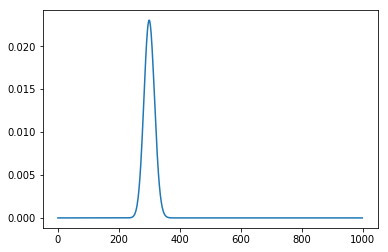

In [98]:
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)